### Porównanie algorytmów klasteryzacji

#### Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

#### Wygenerowanie danych i wizualizacja

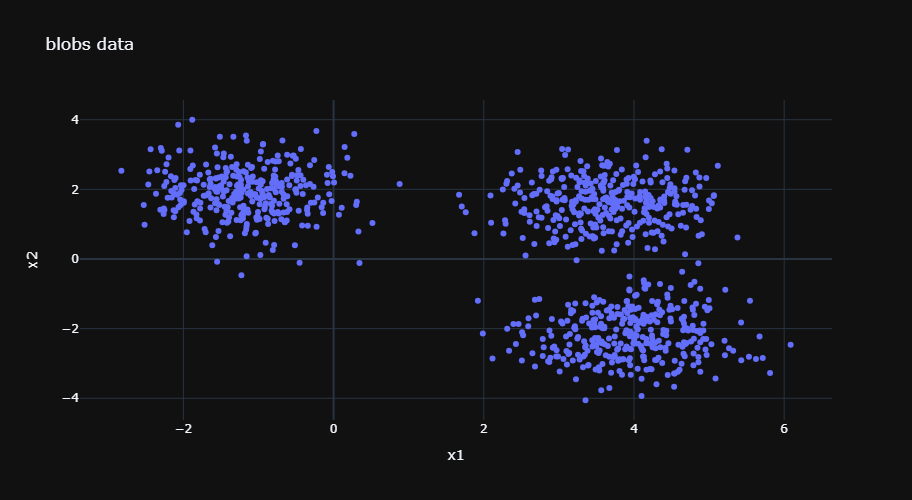

In [2]:
from sklearn.datasets import make_blobs

blobs_data = make_blobs(n_samples=1000, cluster_std=0.7, random_state=24, center_box=(-4.0, 4.0))[0]
blobs = pd.DataFrame(blobs_data, columns=['x1', 'x2'])
px.scatter(blobs, 'x1', 'x2', width=950, height=500, title='blobs data', template='plotly_dark')

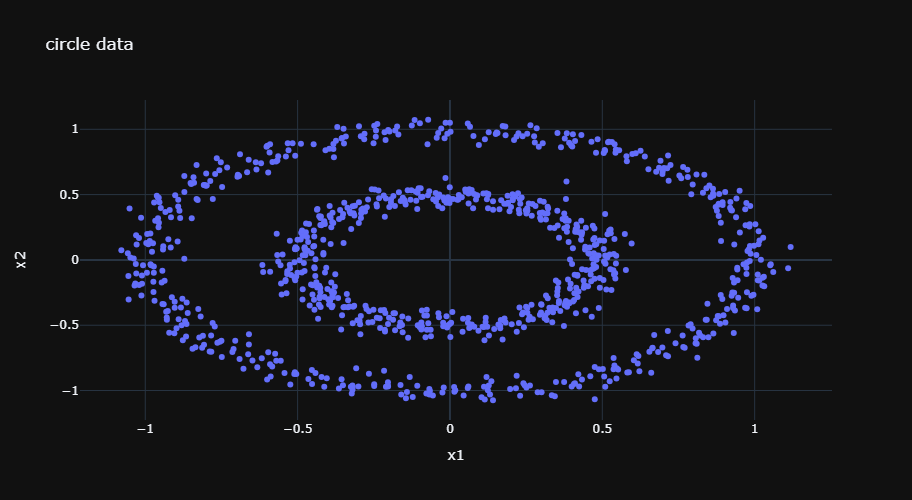

In [3]:
from sklearn.datasets import make_circles

circle_data = make_circles(n_samples=1000, factor=0.5, noise=0.05)[0]
circle = pd.DataFrame(circle_data, columns=['x1', 'x2'])
px.scatter(circle, 'x1', 'x2', width=950, height=500, title='circle data', template='plotly_dark')

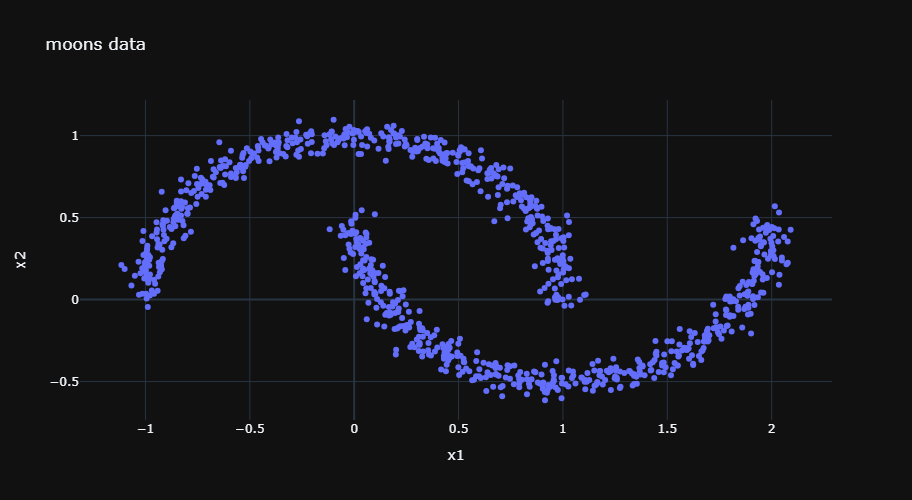

In [4]:
from sklearn.datasets import make_moons

moons_data = make_moons(n_samples=1000, noise=0.05)[0]
moons = pd.DataFrame(moons_data, columns=['x1', 'x2'])
px.scatter(moons, 'x1', 'x2', width=950, height=500, title='moons data', template='plotly_dark')

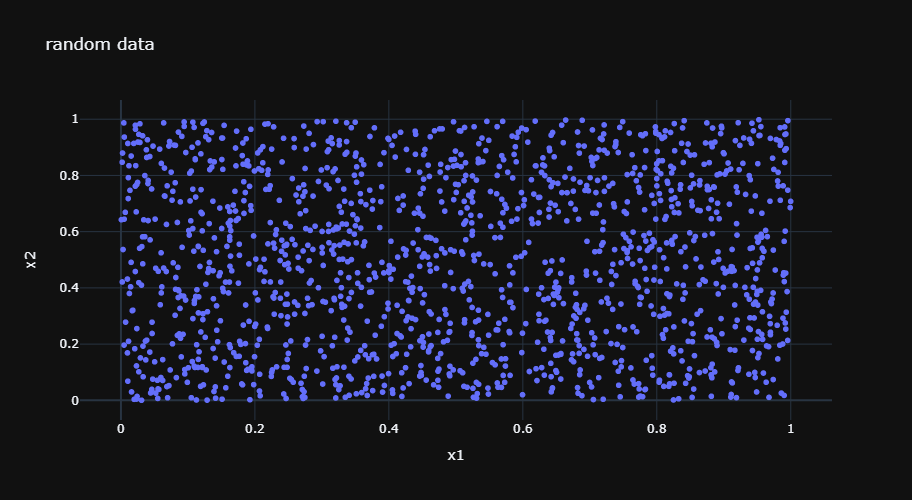

In [5]:
random_data = np.random.rand(1500, 2)
random = pd.DataFrame(random_data, columns=['x1', 'x2'])
px.scatter(random, 'x1', 'x2', width=950, height=500, title='random data', template='plotly_dark')

#### Blobs data - 3 klastry

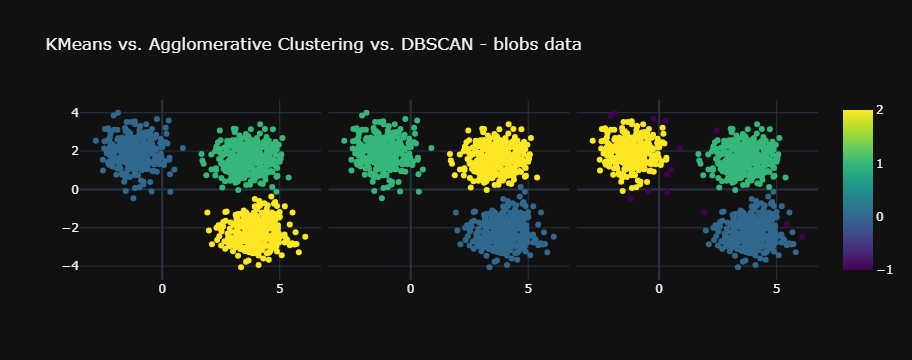

In [6]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, shared_yaxes=True, horizontal_spacing=0.01)

# KMEANS
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(blobs_data)
clusters = kmeans.predict(blobs_data)
blobs['cluster'] = clusters
trace1 = px.scatter(blobs, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace1, row=1, col=1)

# AHC
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean')
clusters = agglo.fit_predict(blobs_data)
blobs['cluster'] = clusters
trace2 = px.scatter(blobs, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace2, row=1, col=2)

# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(blobs_data)
clusters = dbscan.labels_
blobs['cluster'] = clusters
trace3 = px.scatter(blobs, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace3, row=1, col=3)

fig.update_layout(title='KMeans vs. Agglomerative Clustering vs. DBSCAN - blobs data', 
                  template='plotly_dark', coloraxis = {'colorscale':'viridis'})
fig.show()

#### Cirlce data - 2 klastry

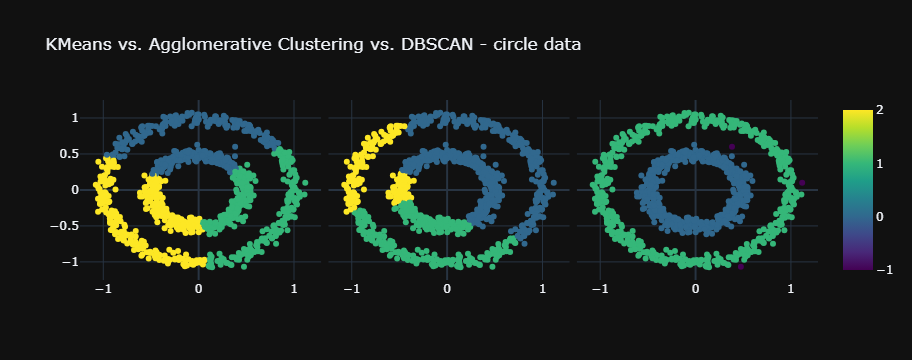

In [7]:
fig = make_subplots(rows=1, cols=3, shared_yaxes=True, horizontal_spacing=0.01)

# KMeans
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(circle_data)
clusters = kmeans.predict(circle_data)
circle['cluster'] = clusters
trace1 = px.scatter(circle, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace1, row=1, col=1)

# AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean')
clusters = agglo.fit_predict(circle_data)
circle['cluster'] = clusters
trace2 = px.scatter(circle, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace2, row=1, col=2)

# DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(circle_data)
clusters = dbscan.labels_
circle['cluster'] = clusters
trace3 = px.scatter(circle, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace3, row=1, col=3)

fig.update_layout(title='KMeans vs. Agglomerative Clustering vs. DBSCAN - circle data', template='plotly_dark',
                  coloraxis = {'colorscale':'viridis'})

#### Moons data - 2 klastry 

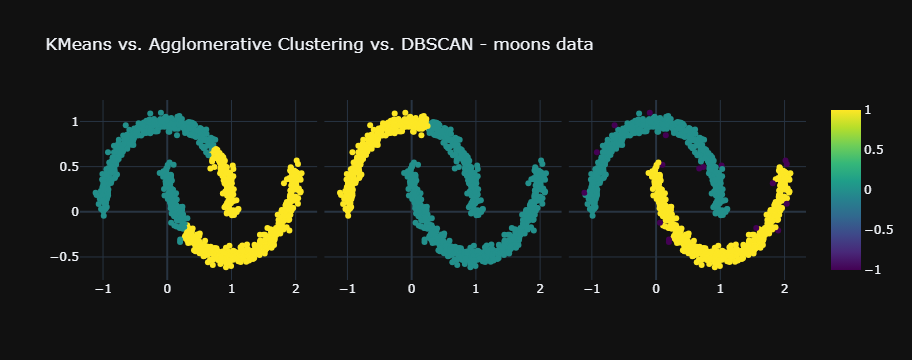

In [8]:
fig = make_subplots(rows=1, cols=3, shared_yaxes=True, horizontal_spacing=0.01)

# KMeans
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(moons_data)
clusters = kmeans.predict(moons_data)
moons['cluster'] = clusters
trace1 = px.scatter(moons, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace1, row=1, col=1)

# AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=2, metric='euclidean')
clusters = agglo.fit_predict(moons_data)
moons['cluster'] = clusters
trace2 = px.scatter(moons, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace2, row=1, col=2)

# DBSCAN
dbscan = DBSCAN(eps=0.07, min_samples=5)
dbscan.fit(moons_data)
clusters = dbscan.labels_
moons['cluster'] = clusters
trace3 = px.scatter(moons, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace3, row=1, col=3)

fig.update_layout(title='KMeans vs. Agglomerative Clustering vs. DBSCAN - moons data', template='plotly_dark',
                  coloraxis = {'colorscale':'viridis'})

#### Random data

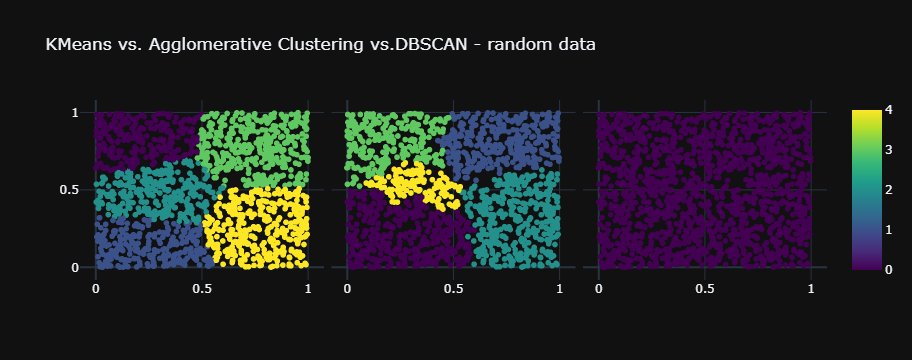

In [9]:
fig = make_subplots(rows=1, cols=3, shared_yaxes=True, horizontal_spacing=0.01)

# KMeans
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(random_data)
clusters = kmeans.predict(random_data)
random['cluster'] = clusters
trace1 = px.scatter(random, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace1, row=1, col=1)

# AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=5, metric='euclidean')
clusters = agglo.fit_predict(random_data)
random['cluster'] = clusters
trace2 = px.scatter(random, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace2, row=1, col=2)

# DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(random_data)
clusters = dbscan.labels_
random['cluster'] = clusters
trace3 = px.scatter(random, 'x1', 'x2', 'cluster', width=800, height=500)['data'][0]
fig.add_trace(trace3, row=1, col=3)

fig.update_layout(title='KMeans vs. Agglomerative Clustering vs.DBSCAN - random data', template='plotly_dark',
                  coloraxis = {'colorscale':'viridis'})